In [7]:
# remove duplicate columns
from pandas.io.parsers import read_csv
df = read_csv('all_cases.csv', sep = ';')
columns = []
for i in range(0, len(df.columns)):
    if str(df.columns[i]).find('.', 0, len(str(df.columns[i]))) != -1:
        columns.append(str(df.columns[i]))
    
df.drop(columns, inplace=True, axis=1)
df.head()

,anomaly_development_of_mediastinum_vessels,date,drug_susceptibility_testing_mfx,method_of_identification,clinical_record_id,post_tb_residuals,isolate_id,lifestyle_smoking,co_morbidity,culture_result,...,bactec_test_e,result_of_previous_treatment,sequence_name,GenBank,lung_capacity_decrease,comments,shadow_pattern,low_paid_work_abroad,drug_susceptibility_testing_pas,drug_susceptibility_testing_cs
0,0,2014-12-02,0,biochemistry,391,1,871.0,0,1,1,...,resistant,new,NaN,NaN,0,NaN,focal(s) + focus(es) + infiltrate(s),0,resistant,resistant
1,0,2012-06-20,0,biochemistry,213,0,11560.0,0,0,1,...,0,new,NaN,NaN,0,NaN,focal(s) + focus(es),0,0,0
2,0,2004-01-16,0,biochemistry,319,0,1156.0,0,1,1,...,sensitive,relapse,NaN,NaN,0,NaN,focal(s) + focus(es) + infiltrate(s),0,resistant,resistant
3,0,2014-03-27,0,biochemistry,386,0,10006.0,0,1,1,...,0,new,NaN,NaN,0,NaN,focal(s) + focus(es),0,sensitive,sensitive
4,0,2014-11-28,0,biochemistry,388,1,161077.0,0,1,1,...,0,new,NaN,NaN,1,NaN,focal(s) + focus(es) + infiltrate(s),0,resistant,resistant


In [8]:
# direct coding on nominal features
import pandas as pd
columns = ['education', 'habitation', 'job', 'treatment_result', 'result_of_previous_treatment', 'drug_susceptibility_testing_am', 'drug_susceptibility_testing_amx_clv', 'drug_susceptibility_testing_cm', 'drug_susceptibility_testing_cs', 'drug_susceptibility_testing_e', 'drug_susceptibility_testing_h', 'drug_susceptibility_testing_km', 'drug_susceptibility_testing_lfx', 'drug_susceptibility_testing_mb', 'drug_susceptibility_testing_mfx', 'drug_susceptibility_testing_ofx', 'drug_susceptibility_testing_pas', 'drug_susceptibility_testing_pto', 'drug_susceptibility_testing_r', 'drug_susceptibility_testing_s', 'drug_susceptibility_testing_z']
df1 = pd.get_dummies(df[columns])
df_new = df.join(df1, how='inner')
df_new.head()

,anomaly_development_of_mediastinum_vessels,date,drug_susceptibility_testing_mfx,method_of_identification,clinical_record_id,post_tb_residuals,isolate_id,lifestyle_smoking,co_morbidity,culture_result,...,drug_susceptibility_testing_pto_sensitive,drug_susceptibility_testing_r_0,drug_susceptibility_testing_r_resistant,drug_susceptibility_testing_r_sensitive,drug_susceptibility_testing_s_0,drug_susceptibility_testing_s_resistant,drug_susceptibility_testing_s_sensitive,drug_susceptibility_testing_z_0,drug_susceptibility_testing_z_resistant,drug_susceptibility_testing_z_sensitive
0,0,2014-12-02,0,biochemistry,391,1,871.0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
1,0,2012-06-20,0,biochemistry,213,0,11560.0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0,2004-01-16,0,biochemistry,319,0,1156.0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
3,0,2014-03-27,0,biochemistry,386,0,10006.0,0,1,1,...,1,0,0,1,1,0,0,1,0,0
4,0,2014-11-28,0,biochemistry,388,1,161077.0,0,1,1,...,0,0,0,1,1,0,0,0,1,0


In [4]:
# checking null values
df_new.isnull().sum()

treatment_regimen_lzd                          0
treatment_regimen_ofx                          0
affect_level                                   1
shadow_pattern                                 1
drug_susceptibility_testing_ofx                0
bactec_test_h                                  0
diagnosis                                      0
type_of_drug_resistance                        0
gene_test_is_performed                         0
drug_susceptibility_testing_s                  0
dissemination                                  0
date                                           0
anomaly_of_lung_develop                        0
affect_pleura                                  0
drug_susceptibility_testing_mfx                0
bactec_test_amx_clv                            0
drug_susceptibility_testing_cs                 0
drug_susceptibility_testing_mb                 0
symptoms_of_tb                                 0
treatment_regimen_lfx                          0
bactec_test_lfx     

In [10]:
# null removal 
df = df_new.dropna(subset=['result_of_previous_treatment_new', 'result_of_previous_treatment_relapse', 'result_of_previous_treatment_treatmentafterfailure', 'result_of_previous_treatment_treatmentafterdefault', 'result_of_previous_treatment_unknown', 'result_of_previous_treatment_other', 'surgery_treatment', 'msc_treatment', 'smear_result', 'culture_result' , 'co_morbidity', 'height_cm', 'weight_cm', 'disability_level', 'symptoms_of_tb', 'education_complete school (a-level', 'education_college (bachelor)', 'education_higher (university)', 'habitation_private house', 'habitation_flat', 'habitation_dormitory', 'habitation_homeless', 'ex_prisoner', 'lifestyle_alcoholic', 'lifestyle_addict', 'lifestyle_smoking', 'job_employment', 'job_unemployed', 'job_student', 'job_retiree', 'job_invalid', 'hiv', 'art', 'anomaly_development_of_mediastinum_vessels', 'anomaly_of_lung_develop', 'bronchial_obstruction', 'dissemination', 'lung_capacity_decrease', 'lymphoadenopatia', 'nodi_calcinatum', 'plevritis', 'pneumothorax', 'treatment_result_incomplete', 'treatment_result_failure', 'treatment_result_successful', 'treatment_result_complete', 'treatment_result_default', 'treatment_result_death', 'treatment_result_other'])
df.head()

,anomaly_development_of_mediastinum_vessels,date,drug_susceptibility_testing_mfx,method_of_identification,clinical_record_id,post_tb_residuals,isolate_id,lifestyle_smoking,co_morbidity,culture_result,...,drug_susceptibility_testing_pto_sensitive,drug_susceptibility_testing_r_0,drug_susceptibility_testing_r_resistant,drug_susceptibility_testing_r_sensitive,drug_susceptibility_testing_s_0,drug_susceptibility_testing_s_resistant,drug_susceptibility_testing_s_sensitive,drug_susceptibility_testing_z_0,drug_susceptibility_testing_z_resistant,drug_susceptibility_testing_z_sensitive
0,0,2014-12-02,0,biochemistry,391,1,871.0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
1,0,2012-06-20,0,biochemistry,213,0,11560.0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0,2004-01-16,0,biochemistry,319,0,1156.0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
3,0,2014-03-27,0,biochemistry,386,0,10006.0,0,1,1,...,1,0,0,1,1,0,0,1,0,0
4,0,2014-11-28,0,biochemistry,388,1,161077.0,0,1,1,...,0,0,0,1,1,0,0,0,1,0


In [5]:
# division into training and test samples
columns_X = ['result_of_previous_treatment_new', 'result_of_previous_treatment_relapse', 'result_of_previous_treatment_treatmentafterfailure', 'result_of_previous_treatment_treatmentafterdefault', 'result_of_previous_treatment_unknown', 'result_of_previous_treatment_other', 'surgery_treatment', 'msc_treatment', 'smear_result', 'culture_result' , 'co_morbidity', 'height_cm', 'weight_cm', 'disability_level', 'symptoms_of_tb', 'education_complete school (a-level', 'education_college (bachelor)', 'education_higher (university)', 'habitation_private house', 'habitation_flat', 'habitation_dormitory', 'habitation_homeless', 'ex_prisoner', 'lifestyle_alcoholic', 'lifestyle_addict', 'lifestyle_smoking', 'job_employment', 'job_unemployed', 'job_student', 'job_retiree', 'job_invalid', 'hiv', 'art', 'anomaly_development_of_mediastinum_vessels', 'anomaly_of_lung_develop', 'bronchial_obstruction', 'dissemination', 'lung_capacity_decrease', 'lymphoadenopatia', 'nodi_calcinatum', 'plevritis', 'pneumothorax']
df_for = df[columns_X]
X = df_for.values
columns_y = ['treatment_result_incomplete', 'treatment_result_failure', 'treatment_result_successful', 'treatment_result_complete', 'treatment_result_default', 'treatment_result_death', 'treatment_result_other']
y = df[columns_y].values
columns_y1 = ['treatment_result_death']
y1 = df[columns_y1].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

c:\users\user\envs\labs\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# RandomForestClassifier
import numpy as np
from numpy import array
aa = []
bb = []
cc = []
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_for.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    if importances[indices[f]] > 0.03:
        aa.append(indices[f])
        bb.append(feat_labels[indices[f]])
        cc.append(importances[indices[f]])
        print("%2d) %-*s %f" % (f + 1, 30,
                                feat_labels[indices[f]],
                                importances[indices[f]]))
indic = array(aa)
feat_l = array(bb)
importan = array(cc)

c:\users\user\envs\labs\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


 1) disability_level               0.124445
 2) weight_cm                      0.118296
 3) lung_capacity_decrease         0.040348
 4) dissemination                  0.039545
 5) height_cm                      0.039184
 6) education_complete school (a-level 0.036974
 7) culture_result                 0.034589
 8) co_morbidity                   0.032736
 9) job_employment                 0.032621
10) job_student                    0.030054


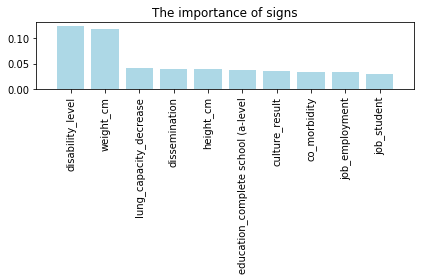

In [8]:
# visualization of importance
import matplotlib.pyplot as plt
plt.title('The importance of signs')
plt.bar(range(indic.shape[0]), importances[indic],
       color = 'lightblue', align='center')
plt.xticks(range(indic.shape[0]),
          feat_labels[indic], rotation=90)
plt.xlim([-1, indic.shape[0]])
plt.tight_layout()
plt.show()

In [9]:
# division into training and test samples for mortality
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3,random_state=0)

In [10]:
# RandomForestClassifier for mortality
import numpy as np
from numpy import array
aa = []
bb = []
cc = []
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_for.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    if importances[indices[f]] > 0.03:
        #importan.append(importances[indices[f]])
        aa.append(indices[f])
        bb.append(feat_labels[indices[f]])
        cc.append(importances[indices[f]])
        print("%2d) %-*s %f" % (f + 1, 30,
                                feat_labels[indices[f]],
                                importances[indices[f]]))
indic = array(aa)
feat_l = array(bb)
importan = array(cc)

c:\users\user\envs\labs\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


 1) weight_cm                      0.137148
 2) disability_level               0.102613
 3) nodi_calcinatum                0.080885
 4) job_student                    0.067523
 5) lung_capacity_decrease         0.060492
 6) symptoms_of_tb                 0.045494
 7) art                            0.044990
 8) dissemination                  0.039154
 9) lifestyle_smoking              0.037258
10) education_complete school (a-level 0.035267
11) lifestyle_addict               0.030376


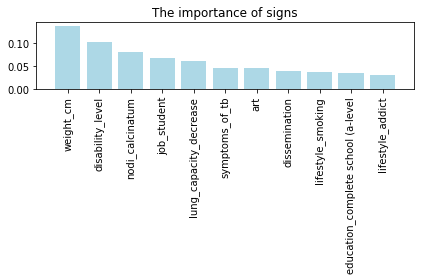

In [11]:
# visualization of importance for mortality
import matplotlib.pyplot as plt
plt.title('The importance of signs')
plt.bar(range(indic.shape[0]), importances[indic],
       color = 'lightblue', align='center')
plt.xticks(range(indic.shape[0]),
          feat_labels[indic], rotation=90)
plt.xlim([-1, indic.shape[0]])
plt.tight_layout()
plt.show()

In [12]:
# decision tree
import numpy as np
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_tree_pred = tree.predict(X_test)


In [13]:
# Decision Tree accuracy 
from sklearn.metrics import accuracy_score
print('Верность: %.2f' % accuracy_score(y_test, y_tree_pred))

Верность: 0.93


In [14]:
# confusion matrix
from sklearn.metrics import confusion_matrix
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[69  3]
 [ 2  0]]


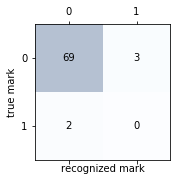

In [15]:
# confusion matrix visualization
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
               s=confmat[i, j],
               va='center', ha='center')
plt.xlabel('recognized mark')
plt.ylabel('true mark')
plt.show()

In [17]:
# recall and precision
import numpy as np

print('recall')
for i in range(0,confmat.shape[1]):
    TPplusFN=np.sum(confmat[i])
    Recall=confmat[i][i]/TPplusFN
    print(Recall)
    
print('precision')
for i in range(0,confmat.shape[1]):
    column=confmat[ : , i]
    TPplusFP=np.sum(column)
    Precision=confmat[i][i]/TPplusFP
    print(Precision)


recall
0.9583333333333334
0.0
precision
0.971830985915493
0.0
